In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import colorama
from colorama import Fore, Back, Style
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

sample_submission=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv',index_col=0)
train_dataset=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv',index_col=0)
test_dataset=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv',index_col=0)

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [20]:
#Visualize the first lines of the train dataset:
print(Fore.BLUE+'FIRST ROWS OF HOUSE PRICES TRAIN DATASET:\n')
display(train_dataset.head())

#Visualize information and statistics about the train dataset:
print(Fore.BLUE+'INFO SUMMARY FOR HOUSE PRICES TRAIN DATASET: \n'+Fore.RESET)
display(train_dataset.info())

print(Fore.BLUE+'DESCRIPTIVE STATS FOR HOUSE PRICES TRAIN DATASET: \n')
display(train_dataset.describe())

FIRST ROWS OF HOUSE PRICES TRAIN DATASET:



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


INFO SUMMARY FOR HOUSE PRICES TRAIN DATASET: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  Overa

None

DESCRIPTIVE STATS FOR HOUSE PRICES TRAIN DATASET: 



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
#Visualize the first lines of the test dataset:
print(Fore.BLUE+'FIRST ROWS OF HOUSE PRICES TEST DATASET:\n')
display(test_dataset.head())

#Visualize information and statistics about the test dataset:
print(Fore.BLUE+'INFO SUMMARY FOR HOUSE PRICES TEST DATASET: \n'+Fore.RESET)
display(test_dataset.info())

print(Fore.BLUE+'DESCRIPTIVE STATS FOR HOUSE PRICES TEST DATASET: \n')
display(test_dataset.describe())

FIRST ROWS OF HOUSE PRICES TEST DATASET:



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


INFO SUMMARY FOR HOUSE PRICES TEST DATASET: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  Ove

None

DESCRIPTIVE STATS FOR HOUSE PRICES TEST DATASET: 



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [22]:
#Group columns with similar info
train_dataset['BsmtBath'] = 0.5*train_dataset['BsmtHalfBath']+ train_dataset['BsmtFullBath']
train_dataset['Bath'] = 0.5*train_dataset['HalfBath']+ train_dataset['FullBath']                                               
train_dataset['House_Age'] = train_dataset['YrSold'] - train_dataset['YearBuilt']
train_dataset['Remod_Age'] = train_dataset['YrSold'] - train_dataset['YearRemodAdd']
train_dataset['Garage_Age'] = train_dataset['YrSold'] - train_dataset['GarageYrBlt']
to_drop=['BsmtFullBath', 'BsmtHalfBath','HalfBath','FullBath','YearBuilt', 'YrSold','GarageYrBlt','YearRemodAdd']        
train_dataset=train_dataset.drop(to_drop,axis=1)  


In [23]:
test_dataset['BsmtBath'] = 0.5*test_dataset['BsmtHalfBath']+ test_dataset['BsmtFullBath']
test_dataset['Bath'] = 0.5*test_dataset['HalfBath']+ test_dataset['FullBath']                                               
test_dataset['House_Age'] = test_dataset['YrSold'] - test_dataset['YearBuilt']
test_dataset['Remod_Age'] = test_dataset['YrSold'] - test_dataset['YearRemodAdd']
test_dataset['Garage_Age'] = test_dataset['YrSold'] - test_dataset['GarageYrBlt']
to_drop=['BsmtFullBath', 'BsmtHalfBath','HalfBath','FullBath','YearBuilt', 'YrSold','GarageYrBlt','YearRemodAdd']        
test_dataset=test_dataset.drop(to_drop,axis=1) 

In [24]:
#keep comulmns with 80% non_NA values
train_dataset=train_dataset.dropna(thresh=0.8* len(train_dataset),axis=1)
test_dataset=test_dataset.dropna(thresh=0.8* len(test_dataset),axis=1)

In [25]:
#Check remaining NA values:
print(Fore.BLUE+'% NA values for TRAIN DATASET: \n'+Fore.RESET,train_dataset.isna().sum()*100/len(train_dataset))
print(Fore.BLUE+'% NA values for TEST DATASET: \n'+Fore.RESET,test_dataset.isna().sum()*100/len(test_dataset))

% NA values for TRAIN DATASET: 
 MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.00

In [26]:
#Replace remaining NA values

#Select num and cat variables in train and test datasets:
train_cat = list(train_dataset.select_dtypes(include='object'))
test_cat = list(test_dataset.select_dtypes(include='object'))

train_num = list(train_dataset.select_dtypes(exclude='object'))
test_num = list(test_dataset.select_dtypes(exclude='object'))

# Replace NA values per median for numerical variables
for num in train_num:
      train_dataset[num].fillna(train_dataset[num].median(),inplace=True)
for num in test_num:
      test_dataset[num].fillna(test_dataset[num].median(),inplace=True)  
        
# Replace NA values per most frequent mode for categorical variables
for cat in train_cat:
      train_dataset[cat].fillna(train_dataset[cat].mode()[0],inplace=True)
for cat in test_cat:
      test_dataset[cat].fillna(test_dataset[cat].mode()[0],inplace=True) 



In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


for var in train_cat:
    model = ols('SalePrice' + '~' + var, data = train_dataset).fit() #Ordinary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)

              df        sum_sq       mean_sq          F        PR(>F)
MSZoning     4.0  9.904000e+11  2.476000e+11  43.840282  8.817634e-35
Residual  1455.0  8.217511e+12  5.647774e+09        NaN           NaN
              df        sum_sq       mean_sq        F    PR(>F)
Street       1.0  1.550534e+10  1.550534e+10  2.45929  0.117049
Residual  1458.0  9.192406e+12  6.304805e+09      NaN       NaN
              df        sum_sq       mean_sq          F        PR(>F)
LotShape     3.0  7.032607e+11  2.344202e+11  40.132852  6.447524e-25
Residual  1456.0  8.504651e+12  5.841106e+09        NaN           NaN
                 df        sum_sq       mean_sq          F        PR(>F)
LandContour     3.0  2.375097e+11  7.916988e+10  12.850188  2.742217e-08
Residual     1456.0  8.970402e+12  6.160990e+09        NaN           NaN
               df        sum_sq       mean_sq         F    PR(>F)
Utilities     1.0  1.886693e+09  1.886693e+09  0.298804  0.584717
Residual   1458.0  9.206025e+12  6.31

In [28]:
#categorical varibales to drop based on ANOVA results
to_drop=['Street','Utilities','LandSlope']
train_dataset.drop(to_drop,axis=1, inplace=True)
test_dataset.drop(to_drop,axis=1, inplace=True)

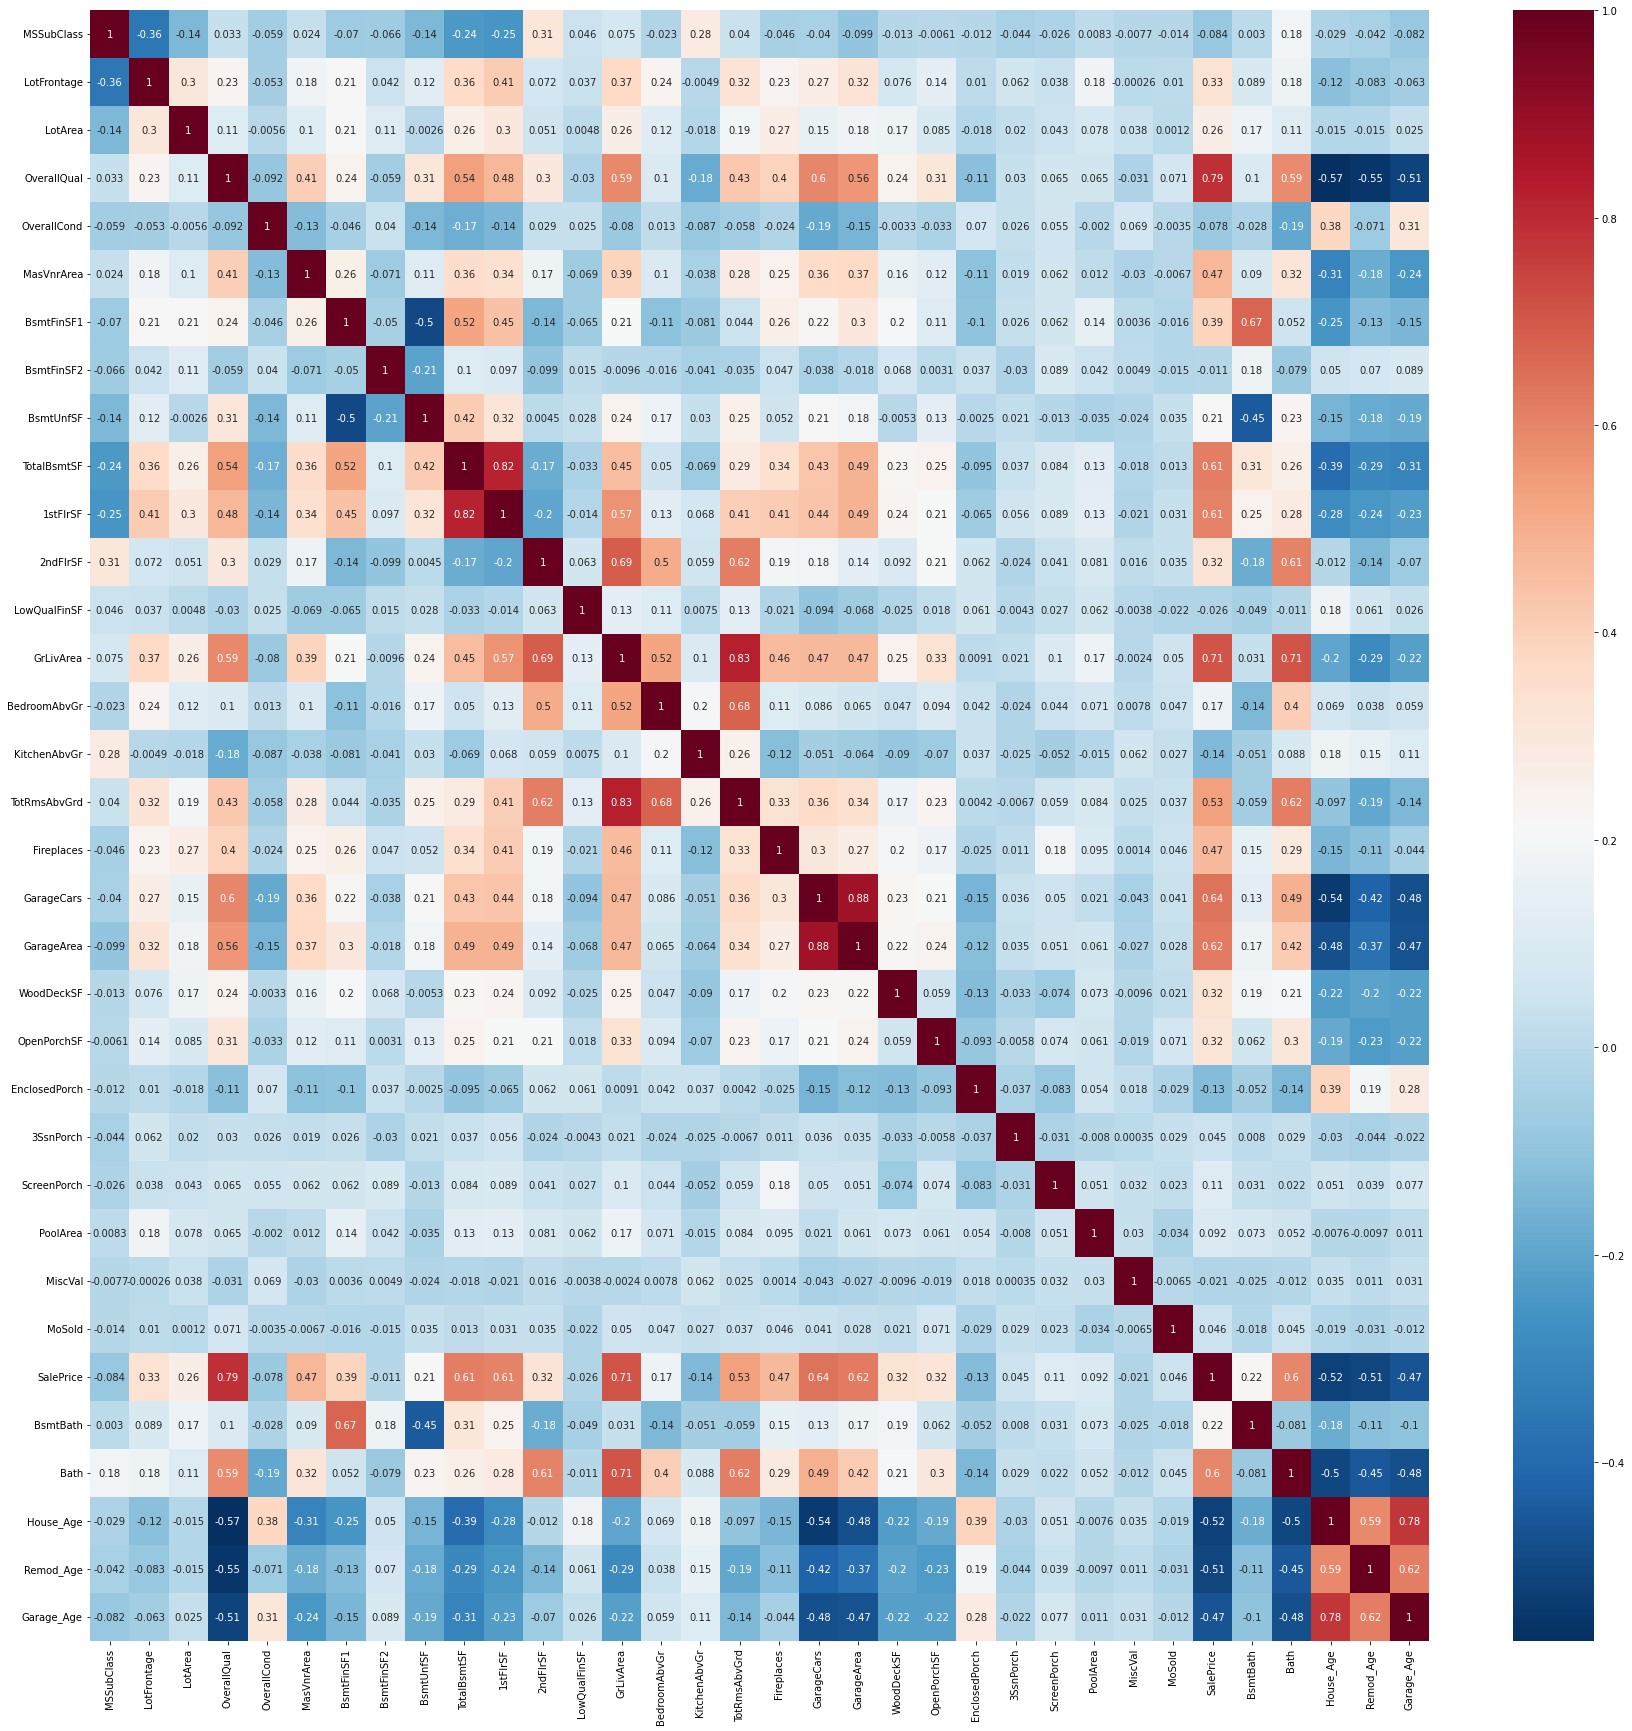

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
#Correlation heatmap of numerical variables 
plt.figure(figsize=(30,30))
cor = train_dataset[train_num].corr()

sns.heatmap(cor, annot=True, cmap="RdBu_r"); 
plt.show();



In [30]:
#Correlation of numerical variables with target SalePrice:
cor_target = abs(cor["SalePrice"])
#Select least relevant features:
non_relevant_features = cor_target[cor_target<0.2]
print(non_relevant_features)

MSSubClass       0.084284
OverallCond      0.077856
BsmtFinSF2       0.011378
LowQualFinSF     0.025606
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal          0.021190
MoSold           0.046432
Name: SalePrice, dtype: float64


In [31]:
#Drop numerical variables having low correlation with SalePrice
train_dataset=train_dataset.drop(non_relevant_features.index,axis=1)
test_dataset=test_dataset.drop(non_relevant_features.index,axis=1)

In [32]:
#Separate features from target SalePrice
X_train=train_dataset.drop('SalePrice',axis=1)
y_train=train_dataset['SalePrice']

In [34]:
#CatBoost model
import catboost as cb
Train_cat = list(X_train.select_dtypes(include='object'))
CBR =cb.CatBoostRegressor(loss_function='RMSE',cat_features=Train_cat)
CBR.fit(X_train, y_train)


Learning rate set to 0.043466
0:	learn: 77335.7532088	total: 75.6ms	remaining: 1m 15s
1:	learn: 75327.5762768	total: 97.5ms	remaining: 48.7s
2:	learn: 73461.8623874	total: 119ms	remaining: 39.5s
3:	learn: 71494.9866648	total: 138ms	remaining: 34.3s
4:	learn: 69578.1885732	total: 157ms	remaining: 31.3s
5:	learn: 67709.4647970	total: 177ms	remaining: 29.3s
6:	learn: 65894.6717840	total: 197ms	remaining: 27.9s
7:	learn: 64111.0111802	total: 216ms	remaining: 26.8s
8:	learn: 62559.4971500	total: 233ms	remaining: 25.6s
9:	learn: 61126.4947030	total: 254ms	remaining: 25.1s
10:	learn: 59537.5740669	total: 271ms	remaining: 24.4s
11:	learn: 58113.0865638	total: 292ms	remaining: 24.1s
12:	learn: 56840.7120145	total: 309ms	remaining: 23.5s
13:	learn: 55567.9285410	total: 330ms	remaining: 23.2s
14:	learn: 54288.9399577	total: 346ms	remaining: 22.7s
15:	learn: 53012.5746341	total: 365ms	remaining: 22.5s
16:	learn: 51881.6004266	total: 383ms	remaining: 22.2s
17:	learn: 50724.0933438	total: 404ms	rema

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pred = CBR.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, pred)))
r2 = r2_score(y_train, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 11583.13
R2: 0.98


In [51]:
pred_test = CBR.predict(test_dataset)

In [44]:
submission2 = pd.DataFrame({'Id':test_dataset.index, 'SalePrice':pred_test})
submission2.set_index('Id',inplace=True, drop=True)
#submission2.set_index('Id')
submission2.to_csv('submission2.csv', index=False)

In [45]:
submission2.head()

,SalePrice
Id,
1461,113458.786685
1462,161747.974969
1463,188298.393514
1464,190416.473285
1465,185402.096182
